<h1><center>Gold: An exploration on it's effect on a portfolio in different market regimes</center></h1>

I read the Bridgewater Research piece about Gold and was prompted to delve deeper into its intricacies, namely how it can be used to achieve a low volatility portfolio. It has to do with how Gold has a negative correlation with most of the stock market while still being a 'volatile' asset. This volatility means that a small capital allocation can lead to a low vol portfolio. Let's conduct an analysis on different stimuli and Gold's corresponding movements and effect on a typical portfolio. 

Let's assume a 60/40 split between stocks and bonds for an up and coming young investor. 
The investments will be between an S&P500 ETF and Total Bond Market ETF.
  Ticker  Annual Return (%)  Sharpe Ratio  Excess Return (%)  \
0    VTI          17.802342      0.597184          13.506342   
1    BND           7.422747      0.622411           3.126747   
2   GC=F          48.829099      2.290699          44.533099   

   Annual Volatility (%)  Risk Category  
0              22.616711      High Risk  
1               5.023601  Moderate Risk  
2              19.440837      High Risk  

Correlation Matrix
Ticker       BND      GC=F       VTI
Ticker                              
BND     1.000000  0.061719  0.075230
GC=F    0.061719  1.000000 -0.035462
VTI     0.075230 -0.035462  1.000000


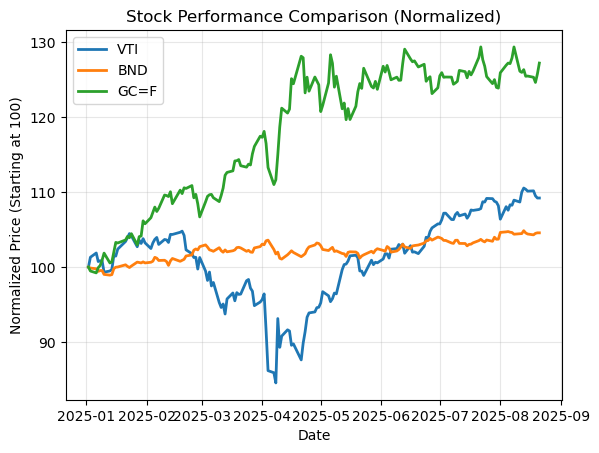

In [7]:
%run PortfolioOptimiser.ipynb
print("""Let's assume a 60/40 split between stocks and bonds for an up and coming young investor. 
The investments will be between an S&P500 ETF and Total Bond Market ETF.""")

SamplePortfolio = PortfolioOptimiser(['VTI', 'BND', 'GC=F'], start_date = '01-01-2025' , end_date = datetime.today())
im_bench = SamplePortfolio.individual_metrics()
print(im_bench)
print('\nCorrelation Matrix')
cv_bench = SamplePortfolio.correlation_matrix()
print(cv_bench)
plot_bench = SamplePortfolio.plot_returns()

The year-to-date analysis reveals gold's superior normalized performance relative to both equities and bonds, achieving an impressive Sharpe ratio that underscores its risk-adjusted returns. This outperformance reflects a broader shift in investor sentiment toward safe-haven assets during periods of heightened uncertainty.

Gold's appeal as an inflation hedge stems from its fundamental characteristics: unlike fiat currencies, it cannot be artificially expanded through monetary printing, nor is it subject to direct manipulation via central bank policy decisions. This monetary independence becomes particularly valuable during economic stress, when traditional yield-bearing assets lose their competitive advantage as interest rates decline and equity risk premiums compress.

The current market dynamics exemplify this relationship perfectly. While 10-year Treasury yields have declined, gold prices have risen disproportionately suggesting that investors are looking for safe haven assets in this time of geopolitical uncertainty. This divergence likely reflects two key factors: tariff-induced inflationary pressures that central banks typically accommodate rather than combat and escalating geopolitical tensions that reinforce gold's role as a store of value.

In essence, gold is fulfilling its historical function as portfolio insurance, providing both inflation protection and geopolitical risk mitigation when investors need it most. I will explore to what extent it has an effect on portfolios, even considering other periods of crises for comparison. 

Next, I will analyse its performance during the COVID period and test what the optimal allocation should be. I have chosen the COVID period as it allows for a comparison across various market regimes and avoids future speculation.


Normalized Performance Covid Crash:


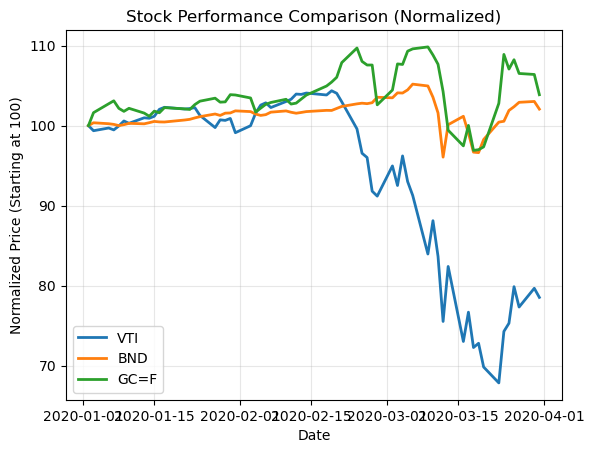


Normalized Performance Covid Recovery:


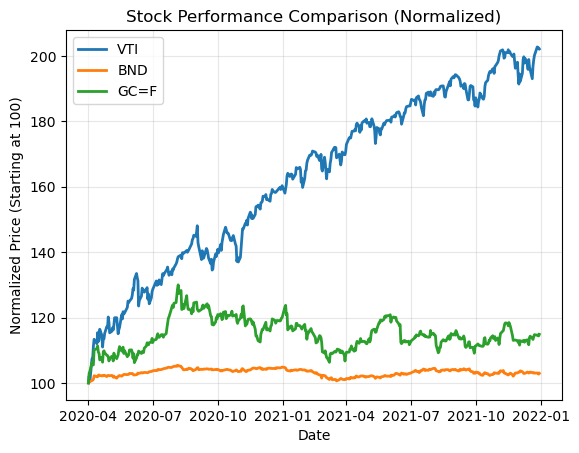


Normalized Performance Covid Full Period:


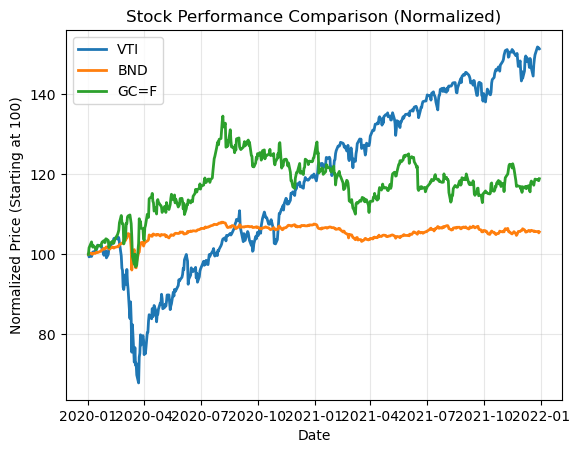

In [8]:
CovidCrash = PortfolioOptimiser(['VTI', 'BND', 'GC=F'], start_date = '2020-01-01', end_date = '2020-04-01')
print('\033[1m' + '\nNormalized Performance Covid Crash:' + '\033[0m')
CovidCrash.plot_returns()

CovidRecovery = PortfolioOptimiser(['VTI', 'BND', 'GC=F'], start_date = '2020-04-01', end_date = '2021-12-31')
print('\033[1m' + '\nNormalized Performance Covid Recovery:' + '\033[0m')
CovidRecovery.plot_returns()

CovidPeriod = PortfolioOptimiser(['VTI', 'BND', 'GC=F'], start_date = '2020-01-01', end_date = '2021-12-31')
print('\033[1m' + '\nNormalized Performance Covid Full Period:' + '\033[0m')
CovidPeriod.plot_returns()

In [9]:
print('\033[1m' + 'Gold Portfolio Volatility Analysis'+'\033[0m')
mu1 = CovidCrash.returns.mean() * 252
S1 = CovidCrash.returns.cov() * 252
ef1 = EfficientFrontier(mu1, S1, weight_bounds=(0, 1))
weights_20 = ef1.efficient_risk(target_volatility = 0.20)
print('\033[1m' + 'Covid Crash volatility targets:' + '\033[0m')
print('20% Volatility Target:')
for v, w in weights_20.items():
    print(f'{v}: {w: .1%}')

weights_15 = ef1.efficient_risk(target_volatility = 0.162)
print('\n16% Volatility Target:')
for v, w in weights_15.items():
    print(f'{v}: {w:.1%}')

mu2 = CovidRecovery.returns.mean() * 252
S2 = CovidRecovery.returns.cov() * 252
ef2 = EfficientFrontier(mu2, S2, weight_bounds=(0, 1))
weights_20_recovery = ef2.efficient_risk(target_volatility = 0.20)
print('\033[1m' + '\nCovid Recovery volatility targets:' + '\033[0m')
print('20% Volatility Target:')
for v, w in weights_20_recovery.items():
    print(f'{v}: {w: .1%}')

weights_15_recovery = ef2.efficient_risk(target_volatility = 0.15)
print('\n15% Volatility Target:')
for v, w in weights_15_recovery.items():
    print(f'{v}: {w:.1%}')

weights_10_recovery = ef2.efficient_risk(target_volatility = 0.10)
print('\n10% Volatility Target:')
for v, w in weights_10_recovery.items():
    print(f'{v}: {w:.1%}')

mu3 = CovidPeriod.returns.mean() * 252
S3 = CovidPeriod.returns.cov() * 252
ef3 = EfficientFrontier(mu3, S3, weight_bounds=(0, 1))
weights_20_period = ef3.efficient_risk(target_volatility = 0.20)
print('\033[1m' + '\nFull Covid Period volatility targets:' + '\033[0m')
print('20% Volatility Target:')
for v, w in weights_20_period.items():
    print(f'{v}: {w: .1%}')

weights_15_period = ef3.efficient_risk(target_volatility = 0.15)
print('\n15% Volatility Target:')
for v, w in weights_15_period.items():
    print(f'{v}: {w:.1%}')

weights_10_period = ef3.efficient_risk(target_volatility = 0.10)
print('\n10% Volatility Target:')
for v, w in weights_10_period.items():
    print(f'{v}: {w:.1%}')

Gold Portfolio Volatility Analysis
Covid Crash volatility targets:
20% Volatility Target:
BND:  36.6%
GC=F:  63.4%
VTI:  0.0%

16% Volatility Target:
BND: 68.9%
GC=F: 31.1%
VTI: 0.0%

Covid Recovery volatility targets:
20% Volatility Target:
BND:  0.0%
GC=F:  0.0%
VTI:  100.0%

15% Volatility Target:
BND: 9.5%
GC=F: 8.5%
VTI: 82.0%

10% Volatility Target:
BND: 41.3%
GC=F: 4.8%
VTI: 53.8%

Full Covid Period volatility targets:
20% Volatility Target:
BND:  0.0%
GC=F:  29.4%
VTI:  70.6%

15% Volatility Target:
BND: 20.6%
GC=F: 31.4%
VTI: 47.9%

10% Volatility Target:
BND: 52.7%
GC=F: 20.6%
VTI: 26.7%


The effects of Gold's ability to reduce volatility are apparent when setting a volatility target during each period. During the crash, Gold is the dominant contributor because of its high return as investors turned to it for a store of value during the crash. However, gold's inherent volatility becomes apparent when examining tighter risk constraints as to go from 20% to 16% volatility required the position in gold to be cut in half. This demonstrates that substantial gold exposure can be reduced while maintaining both portfolio stability and crisis returns.

The recovery phase reveals gold's diminished role during risk-on environments as those with a higher risk appetite would have benefitted entirely from stocks as the recovery returns outclassed both bonds and gold. However, if one were to reduce their risk nonetheless, a contribution of 8.5% to gold and 9.5% bonds would have sufficed, while ensuring that return is maximised for the given volatility target of 15%. Obviously, a further volatility reduction demands more invesment in bonds as its volatility is far lower. 

Across the full period, a higher risk appetite once again spells more allocation towards stocks, but this is where gold's volatility comes into play, still contributing 30% as a form of insurance. This pattern illustrates gold's dual nature: essential portfolio insurance during stress periods, yet secondary to bonds for pure volatility reduction given gold's own volatility profile.

This analysis only looks at volatility targets, thus providing only one lens through which to evaluate gold's role in a portfolio. It can be used to optimise other metrics such as the Sharpe ratio, especially in times of crisis where it doesn not need to compete with other risk premium assets.

In [10]:
print("COVID CRASH PERIOD (Jan-Apr 2020):")
print("Individual Metrics:")
crash_metrics = CovidCrash.individual_metrics()
print(crash_metrics)

print("\nCorrelation Matrix:")
crash_corr = CovidCrash.correlation_matrix()
print(crash_corr)

print("\nMean Variance Portfolio")
sharpepf_cc = CovidCrash.portfolio_optimisation_sharpe()
optimal_weights = dict(sharpepf_cc['max_sharpe']['weights'])
print("Optimal weights:", optimal_weights)
cc_portfolio_return = sharpepf_cc['max_sharpe']['return'] * 100  # Convert to %
cc_portfolio_vol = sharpepf_cc['max_sharpe']['volatility'] * 100
cc_portfolio_sharpe = sharpepf_cc['max_sharpe']['sharpe']
print(f"Optimal portfolio return: {cc_portfolio_return:.1f}%")
print(f"Optimal portfolio volatility: {cc_portfolio_vol:.1f}%") 
print(f"Optimal portfolio Sharpe: {cc_portfolio_sharpe:.2f}")



print("\nCOVID RECOVERY PERIOD (Apr 2020-Dec 2021):")
print("Individual Metrics:")
recovery_metrics = CovidRecovery.individual_metrics()
print(recovery_metrics)

print("\nCorrelation Matrix:")
recovery_corr = CovidRecovery.correlation_matrix()
print(recovery_corr)

print("\nMean Variance Portfolio")
sharpepf_cr = CovidRecovery.portfolio_optimisation_sharpe()
optimal_weights = dict(sharpepf_cr['max_sharpe']['weights'])
print("Optimal weights:", optimal_weights)
cr_portfolio_return = sharpepf_cr['max_sharpe']['return'] * 100  # Convert to %
cr_portfolio_vol = sharpepf_cr['max_sharpe']['volatility'] * 100
cr_portfolio_sharpe = sharpepf_cr['max_sharpe']['sharpe']
print(f"Optimal portfolio return: {cr_portfolio_return:.1f}%")
print(f"Optimal portfolio volatility: {cr_portfolio_vol:.1f}%") 
print(f"Optimal portfolio Sharpe: {cr_portfolio_sharpe:.2f}")


print("\nFULL COVID PERIOD (2020-2021):")
print("Individual Metrics:")
recovery_metrics = CovidPeriod.individual_metrics()
print(recovery_metrics)

print("\nCorrelation Matrix:")
recovery_corr = CovidPeriod.correlation_matrix()
print(recovery_corr)

print("\nMean Variance Portfolio")
sharpepf_cfp = CovidPeriod.portfolio_optimisation_sharpe()
optimal_weights = dict(sharpepf_cfp['max_sharpe']['weights'])
print("Optimal weights:", optimal_weights)
cfp_portfolio_return = sharpepf_cfp['max_sharpe']['return'] * 100  # Convert to %
cfp_portfolio_vol = sharpepf_cfp['max_sharpe']['volatility'] * 100
cfp_portfolio_sharpe = sharpepf_cfp['max_sharpe']['sharpe']
print(f"Optimal portfolio return: {cfp_portfolio_return:.1f}%")
print(f"Optimal portfolio volatility: {cfp_portfolio_vol:.1f}%") 
print(f"Optimal portfolio Sharpe: {cfp_portfolio_sharpe:.2f}")

COVID CRASH PERIOD (Jan-Apr 2020):
Individual Metrics:
  Ticker  Annual Return (%)  Sharpe Ratio  Excess Return (%)  \
0    VTI         -56.799507     -1.081183         -61.095507   
1    BND          10.584781      0.348364           6.288781   
2   GC=F          21.668455      0.611358          17.372455   

   Annual Volatility (%) Risk Category  
0              56.508022     High Risk  
1              18.052351     High Risk  
2              28.416153     High Risk  

Correlation Matrix:
Ticker       BND      GC=F       VTI
Ticker                              
BND     1.000000  0.134783  0.292673
GC=F    0.134783  1.000000  0.217955
VTI     0.292673  0.217955  1.000000

Mean Variance Portfolio
Optimal weights: {'BND': 0.54295, 'GC=F': 0.45705, 'VTI': 0.0}
Optimal portfolio return: 14.4%
Optimal portfolio volatility: 17.3%
Optimal portfolio Sharpe: 0.83

COVID RECOVERY PERIOD (Apr 2020-Dec 2021):
Individual Metrics:
  Ticker  Annual Return (%)  Sharpe Ratio  Excess Return (%)  \
0  

The portfolio allocation analysis reveals the importance of dynamic rebalancing for Sharpe ratio optimization across different market regimes. During the COVID crash, when equities delivered negative returns, the optimal strategy heavily favoured defensive assets with bonds comprising 54% and gold representing the rest. This substantial gold weighting underscores its effectiveness as both a store of value and return generator during market stress, delivering an impressive 22% annualized return when traditional assets faltered.
However, maintaining this defensive posture throughout the entire period would have been suboptimal. The recovery phase witnessed a dramatic reallocation toward riskier assets, with stocks capturing 54% of the optimal portfolio as markets embraced the digital transformation. Companies like Zoom exemplified how technology firms capitalized on pandemic-driven structural changes. While gold continued generating positive returns during recovery, its elevated volatility relative to risk-adjusted returns prevented it from maintaining its crisis-level allocation.
Notably, despite gold outperforming bonds during the recovery period, its higher volatility profile limited its optimal weighting compared to stocks, which offered superior risk-adjusted returns. This dynamic illustrates a fundamental portfolio management principle: optimal allocations depend not just on expected returns, but on the risk-return efficiency of each asset within the broader portfolio context.
The analysis crystallizes around a central challenge: while tactical rebalancing clearly enhances risk-adjusted returns as evidenced by the recovery portfolio's 2.37 Sharpe ratio versus the crash period's 0.83, the practical question remains when to execute these transitions. Timing market regime changes represents the enduring puzzle of active portfolio management.